In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv("alldata.csv.zip",compression="zip")
raw_data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
def remove_zipcode(location):
    if str(location) != 'nan':
        elems = location.split()
        try:
            zipcode = int(elems[-1])
            location = ' '.join(elems[:-1])
        except:
            location = ' '.join(elems)
    return location

In [4]:
cities = raw_data['location'].apply(remove_zipcode)
raw_data = raw_data.assign(city = cities)

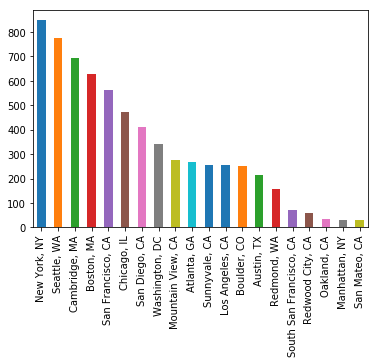

In [5]:
raw_data['city'].value_counts().head(20).plot('bar')

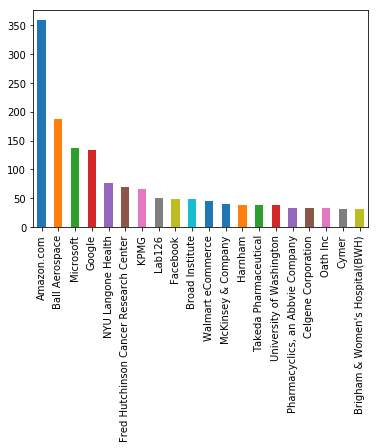

In [6]:
raw_data['company'].value_counts().head(20).plot('bar')

In [7]:
company_city = raw_data[['company', 'city', 'position']].groupby(['company', 'city']).count().reset_index()
company_city.sort_values('position', ascending = False)

,company,city,position
157,Amazon.com,"Seattle, WA",233
295,Ball Aerospace,"Boulder, CO",187
1619,Microsoft,"Redmond, WA",110
1691,NYU Langone Health,"New York, NY",77
986,Fred Hutchinson Cancer Research Center,"Seattle, WA",70
1083,Google,"Mountain View, CA",62
153,Amazon.com,"Cambridge, MA",50
402,Broad Institute,"Cambridge, MA",49
2619,Walmart eCommerce,"Sunnyvale, CA",43
2546,University of Washington,"Seattle, WA",39


In [8]:
company_city[company_city.city == 'New York, NY']

,company,city,position
1,1199SEIU Family of Funds,"New York, NY",1
10,3Q Digital,"New York, NY",1
11,605,"New York, NY",1
14,7Park Data,"New York, NY",3
17,A+E Networks,"New York, NY",1
23,ACLU,"New York, NY",4
24,ACT Commodities,"New York, NY",1
26,ADP,"New York, NY",1
35,AIG,"New York, NY",4
52,AT&T,"New York, NY",2
